# Pynamical: phase diagrams of the logistic map

Author: Geoff Boeing

http://geoffboeing.com/2015/04/visualizing-chaos-and-randomness/

This notebook demonstrates several ways to create phase diagrams to visualize system attractors and differentiate random noise from chaos. Phase diagrams embed 1-dimensional data (like time series) from a dynamical system into 2- or 3-dimensional phase space by plotting the value at time t vs the value at time t+1 (vs the value at time t+2, if it's a 3-D plot).

In [1]:
from pynamical import simulate, save_fig, phase_diagram, phase_diagram_3d, title_font, label_font
import pandas as pd, numpy as np, matplotlib.pyplot as plt, random, IPython.display as display
%matplotlib inline

## First, let's a create a phase diagram to show the logistic map's fixed-point attractor at 0.655 when the growth rate parameter is set to 2.9

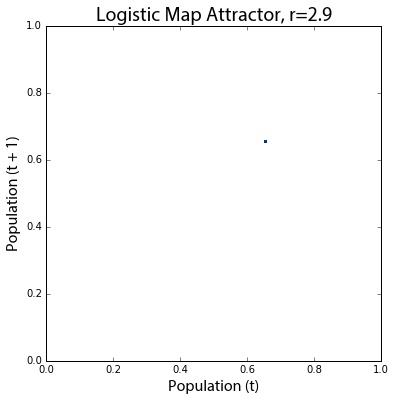

In [2]:
# draw a phase diagram for 100 generations for the growth rate parameter 2.9
# it shows points converging on 0.655 because the logistic map has a fixed-point attractor at 0.655 when r=2.9
pops = simulate(num_gens=100, rate_min=2.9, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=2.9', size=20)

## Next, let's create phase diagrams to show the logistic map's limit cycle attractor when the growth rate parameter is set to 3.50 - 3.57

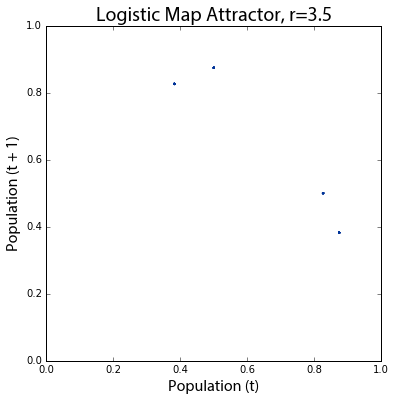

In [3]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.5
# it shows 4 points because the logistic map has a period of 4 when r=3.5
pops = simulate(num_gens=100, rate_min=3.5, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=3.5', size=20)

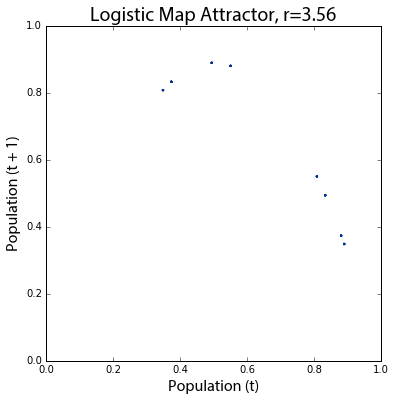

In [4]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.56
# it shows 8 points because the logistic map has a period of 8 when r=3.56
pops = simulate(num_gens=100, rate_min=3.56, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=3.56', size=20)

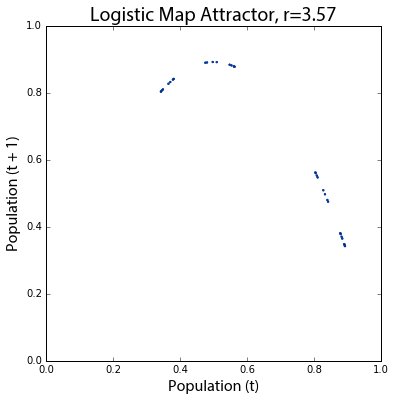

In [5]:
# draw a phase diagram for 100 generations for the growth rate parameter 3.57
# it shows n points because the logistic map has a period of n when r=3.57
pops = simulate(num_gens=100, rate_min=3.57, num_rates=1, num_discard=100)
phase_diagram(pops, title='Logistic Map Attractor, r=3.57', size=20)

## Now, let's create a phase diagram to show the logistic map's strange attractor when the growth rate parameter is set to 3.9

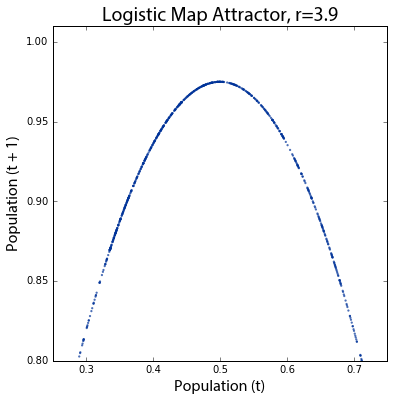

In [6]:
# draw a phase diagram for 2,000 generations for the growth rate parameter 3.9
# the plot reveals the strange attractor - the logistic map is chaotic when r=3.9
pops = simulate(num_gens=2000, rate_min=3.9, num_rates=1)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=20, title='Logistic Map Attractor, r=3.9')

## Now, let's create a phase diagram to show the logistic map's strange attractors across the chaotic regime (from r=3.6 to r=4.0)

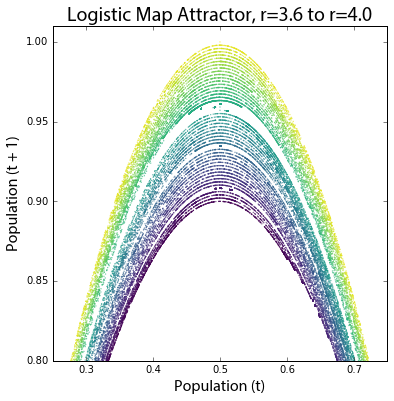

In [7]:
# draw a phase diagram for 2,000 generations across 50 growth rate steps from 3.6 to 4.0
# each chaotic growth rate has its own parabola
pops = simulate(num_gens=2000, rate_min=3.6, rate_max=4.0, num_rates=50)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, size=7, 
              title='Logistic Map Attractor, r=3.6 to r=4.0', color='viridis')

## Next, let's demonstrate how to use phase diagrams to differentiate chaos from random noise in time series data

In [8]:
# sometimes it is hard to tell if a time series is chaotic or random
# generate two time series of 1,000 steps, one chaotic and one random
# generate 30,000 time steps for the chaotic series but only keep the final 1,000 (when system is fully evolved)
total_gens = 30000
gens = 1000
chaos_pops = simulate(num_gens=total_gens, rate_min=3.99, num_rates=1)
chaos_pops = chaos_pops.iloc[total_gens-gens:].reset_index().drop(labels='index', axis=1)
random_pops = pd.DataFrame([random.random() for _ in range(0, gens)], columns=['value'])
time_series = pd.concat([chaos_pops, random_pops], axis=1)
time_series.columns = ['chaos', 'random']
time_series.head()

,chaos,random
0,0.900520,0.636353
1,0.357438,0.048576
2,0.916407,0.494075
3,0.305654,0.439179
4,0.846796,0.011601


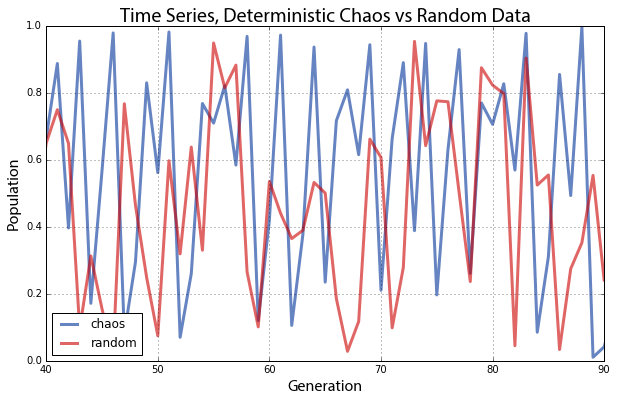

In [9]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
ax = time_series.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['#003399','#cc0000'])
ax.grid(True)
ax.set_xlim(40, 90)
ax.set_ylim(0, 1)
ax.set_title('Time Series, Deterministic Chaos vs Random Data', fontproperties=title_font)
ax.set_xlabel('Generation', fontproperties=label_font)
ax.set_ylabel('Population', fontproperties=label_font)
ax.legend(loc=3)

save_fig('chaos-vs-random-line')
plt.show()

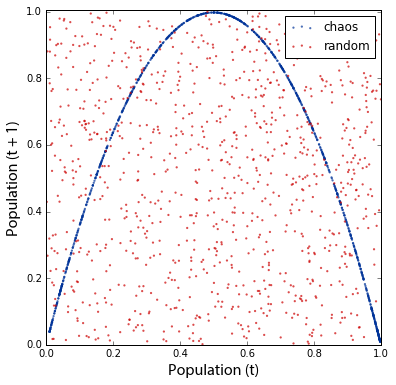

In [10]:
# plot same data as 2D phase diagram instead
pops = pd.concat([chaos_pops, random_pops], axis=1)
pops.columns = ['chaos', 'random']
phase_diagram(pops, size=20, color=['#003399','#cc0000'], ymax=1.005, legend=True, 
              filename='logistic-attractor-chaos-random')

## Now, let's create 3-D phase diagrams to show the same chaos vs random noise, in three dimensions

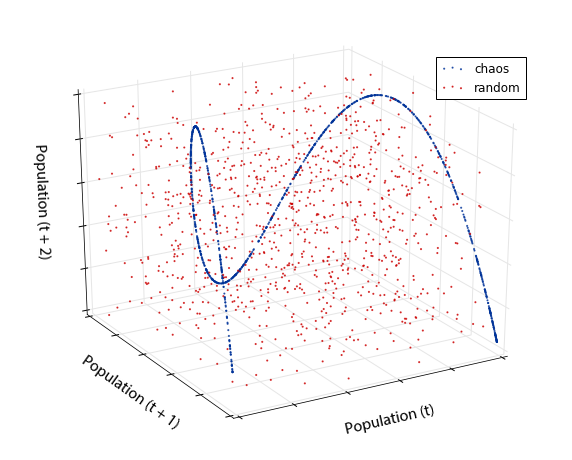

In [11]:
# plot same data as 3D phase diagram instead
phase_diagram_3d(pops, color=['#003399','#cc0000'], filename='logistic-attractor-chaos-random-3d',
                 legend=True, legend_bbox_to_anchor=(0.94, 0.9))

## Create a 3-D phase diagram to show the logistic map's strange attractors across the chaotic regime (from r=3.6 to r=4.0), twisting and curling around their state space in three dimensions

In [12]:
# run logistic model for 4,000 generations across 50 growth rate steps from 3.6 to 4.0
pops = simulate(num_gens=4000, rate_min=3.6, rate_max=4.0, num_rates=50)

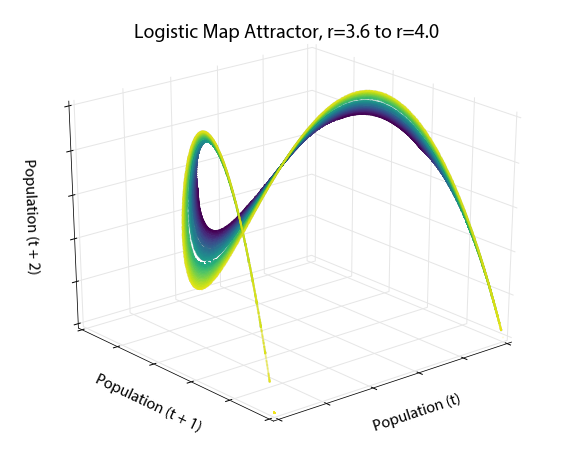

In [13]:
# phase diagram: each chaotic growth rate has its own strange attractor curling through state space
phase_diagram_3d(pops, title='Logistic Map Attractor, r=3.6 to r=4.0', alpha=0.1, color='viridis', color_reverse=False, 
                 azim=230, filename='3d-logistic-map-attractor-1')

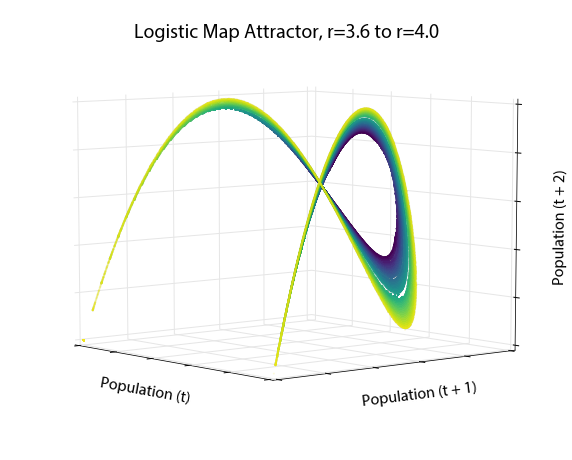

In [14]:
# phase diagram: each chaotic growth rate has its own strange attractor curling through state space
phase_diagram_3d(pops, title='Logistic Map Attractor, r=3.6 to r=4.0', alpha=0.1, color='viridis', color_reverse=False, 
                 elev=7, azim=320, filename='3d-logistic-map-attractor-2')

## In another notebook, I create animated gifs by panning and rotating around my 3-D phase diagrams to reveal even more of their beautiful structure:
[pynamical-demo-3d-animation.ipynb](pynamical-demo-3d-animation.ipynb)

In [15]:
# here's an example of the animated phase diagrams that I create in pynamical-demo-3d-animation.ipynb
display.Image(url='images/animation/logistic-3d-phase-diagram-chaotic-regime.gif')

## For more information about chaos theory, the logistic map, bifurcation plots, phase diagrams, and strange attractors, check out my write-up:
http://geoffboeing.com/2015/03/chaos-theory-logistic-map/
<br />and<br />
http://geoffboeing.com/2015/04/visualizing-chaos-and-randomness/